In [ ]:
import tensorflow as tf


In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
tf.__version__

'2.15.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Churn Modeling.csv')


In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


identify Independent and dependent

In [ ]:
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

feature engineering

In [ ]:
geography = pd.get_dummies(x['Geography'],drop_first = True)
gender = pd.get_dummies(x['Gender'],drop_first = True)

In [ ]:
x= x.drop(['Geography','Gender'],axis = 1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
x = pd.concat([x,geography,gender],axis =1)

In [ ]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

In [ ]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
## create an ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
### lets intialize the ANN
classifier = Sequential()


In [ ]:
classifier.add(Dense(units = 11, activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dropout(0.2))

In [ ]:
classifier.add(Dense(units = 6 , activation = 'relu'))
classifier.add(Dropout(0.3))

In [ ]:
##adding output layer
classifier.add(Dense(units = 1 , activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics =['accuracy'])

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
#train the neural network

In [ ]:
##early stopping
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',

mode= "min", patience = 25, verbose = 1,

restore_best_weights = True,

min_delta = 1)

In [ ]:
model_history = classifier.fit(x_train,y_train,validation_split = 0.33,batch_size=10,epochs=1000,callbacks = earlystop)

Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.4802 - accuracy: 0.7910 - val_loss: 0.4222 - val_accuracy: 0.8016
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4307 - accuracy: 0.8121 - val_loss: 0.4051 - val_accuracy: 0.8175
Epoch 3/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.4157 - accuracy: 0.8125 - val_loss: 0.3926 - val_accuracy: 0.8179
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4118 - accuracy: 0.8143 - val_loss: 0.3932 - val_accuracy: 0.8152
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4113 - accuracy: 0.8173 - val_loss: 0.3874 - val_accuracy: 0.8198
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4056 - accuracy: 0.8158 - val_loss: 0.3899 - val_accuracy: 0.8137
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4110 - accuracy: 0.8147 - val_loss: 0.3905 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

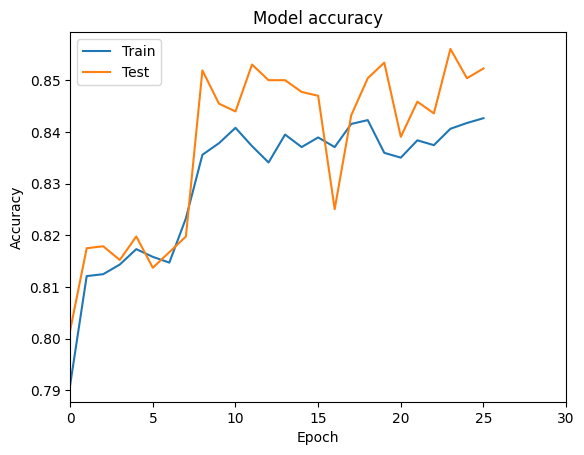

In [ ]:
# prompt: plot model for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlim(0,30)
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [ 385,   20]])

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

In [ ]:
score

0.8075

In [ ]:
#get the weights
classifier.get_weights()

[array([[-0.12843573,  0.09592386, -0.0096083 ,  0.14155515, -0.11976612,
         -0.415901  , -0.47143176, -0.11697817,  0.34065008, -0.281177  ,
          0.31322286],
        [-0.01421057, -0.20184414,  0.03171058, -0.11326934, -1.4069892 ,
          0.5886596 ,  0.46861345,  1.0288839 , -0.8093192 , -0.3131096 ,
         -0.38636234],
        [ 0.27666435,  0.27257565,  0.00713198, -0.49181992, -0.29480535,
          0.02236525,  0.28389806, -0.1357209 ,  0.16018087, -0.1837948 ,
         -0.35010257],
        [ 0.1914533 ,  0.00521966,  0.35143876,  0.27050105, -0.16140085,
         -0.03405888,  0.35230207,  0.20008913, -0.28561056,  0.2513251 ,
         -0.082839  ],
        [-0.2605236 , -0.13640392,  1.0390495 ,  0.25450757,  0.0311828 ,
          0.01911058, -0.29962045, -0.18676198,  0.12477589,  0.08955421,
          0.5743468 ],
        [-0.33245438,  0.39084393, -0.14371371, -0.45739108,  0.07667098,
         -0.19423005, -0.10048747, -0.04457333, -0.32136694, -0.2705437

In [ ]:
!pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 46.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 61.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install tensorflow

In [ ]:
pip install AutoClassifier==0.0.1